# **VIDEO GAMES SALES ANALYSIS**

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

**LOADING DATASET**

In [ ]:
df=pd.read_csv('/content/Project_Videogames.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


**EXPLORATORY DATA ANALYSIS**

In [ ]:
# Printing first five rows
df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Printing the last 5 rows
df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Printing column names
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [ ]:
# Printing the datatype
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [ ]:
# Dimensions of the DataFrame
df.shape

(16719, 16)

In [ ]:
#Summary Statistics
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [ ]:
#Informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
#Finding missing values
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
#Count of Duplicated Rows
df.duplicated().sum()

0

In [ ]:
#Count of '?' Values in Each Column
df.isin(['?']).sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [ ]:
#Value Counts for Categorical Columns
objects = ['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating']

for obj in objects:
    print("Value counts for column:", obj)
    print(df[obj].value_counts())
    print("\n")

Value counts for column: Name
Name
Need for Speed: Most Wanted                         12
FIFA 14                                              9
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: count, Length: 11562, dtype: int64


Value counts for column: Platform
Platform
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
G

**DATA VISUALIZATION**

*What genre games have been made the most?*

In [ ]:
df['Genre'].value_counts()

Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64

<ipython-input-15-1a5f74ffe702>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index,palette='husl' )


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

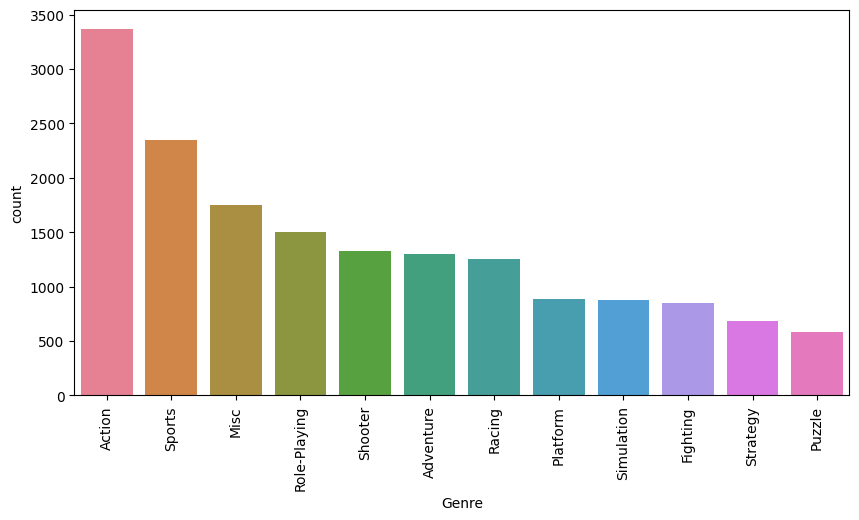

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index,palette='husl' )
plt.xticks(rotation=90)

*Which year had the most game release?*

<ipython-input-16-5f8b8610e900>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Year_of_Release", data=df, order = df.groupby(by=['Year_of_Release'])['Name'].count().sort_values(ascending=False).index,palette='husl')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, '2008.0'),
  Text(1, 0, '2009.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2016.0'),
  Text(15, 0, '2001.0'),
  Text(16, 0, '1998.0'),
  Text(17, 0, '2000.0'),
  Text(18, 0, '1999.0'),
  Text(19, 0, '1997.0'),
  Text(20, 0, '1996.0'),
  Text(21, 0, '1995.0'),
  Text(22, 0, '1994.0'),
  Text(23, 0, '1993.0'),
  Text(24, 0, '1981.0'),
  Text(25, 0, '1992.0'),
  Text(26, 0, '1991.0'),
  Text(27, 0, '1982.0'),
  Text(28, 0, '1986.0'),
  Text(29, 0, '1989.0'),
  Text(30, 0, '1983.0'),
  Text(31,

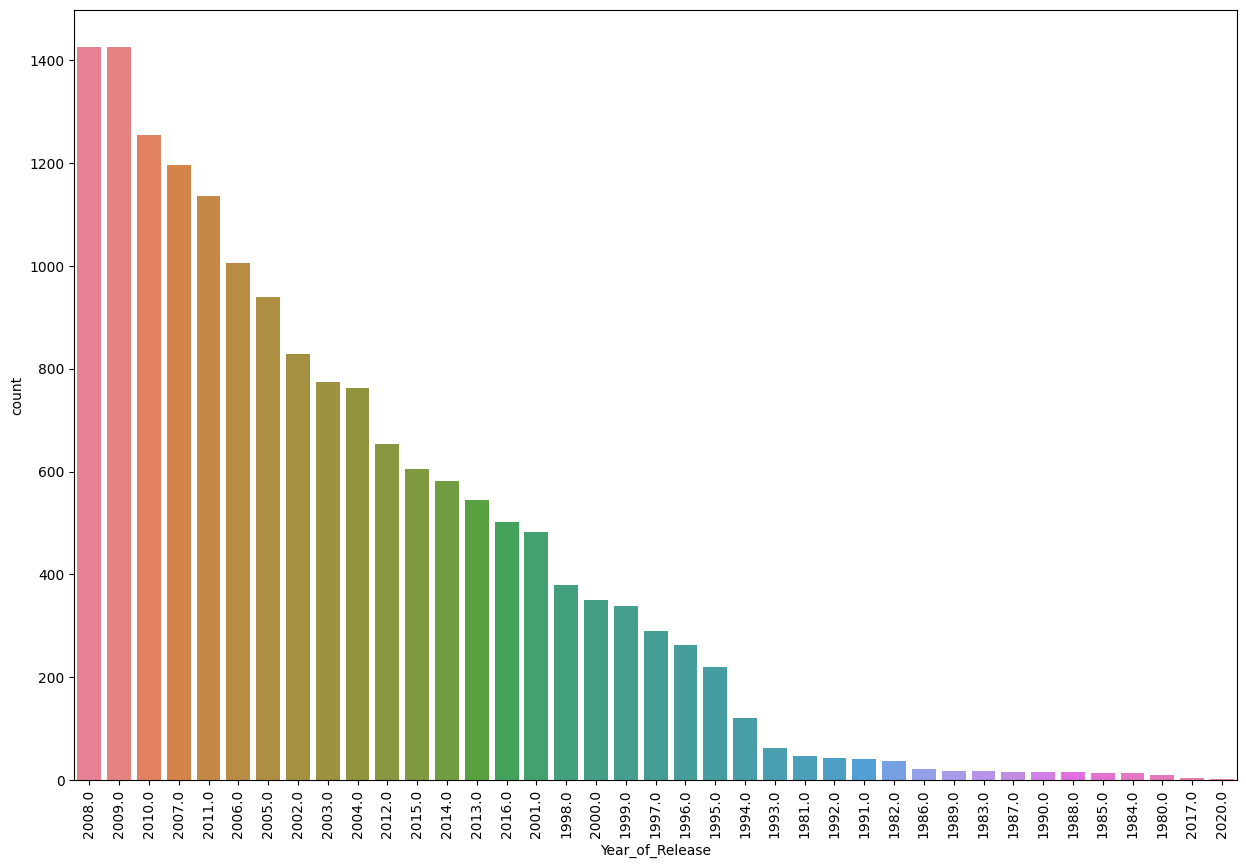

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year_of_Release", data=df, order = df.groupby(by=['Year_of_Release'])['Name'].count().sort_values(ascending=False).index,palette='husl')
plt.xticks(rotation=90)


*Top 5 years games release by genre.*

([0, 1, 2, 3, 4],
 [Text(0, 0, '2008.0'),
  Text(1, 0, '2009.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0')])

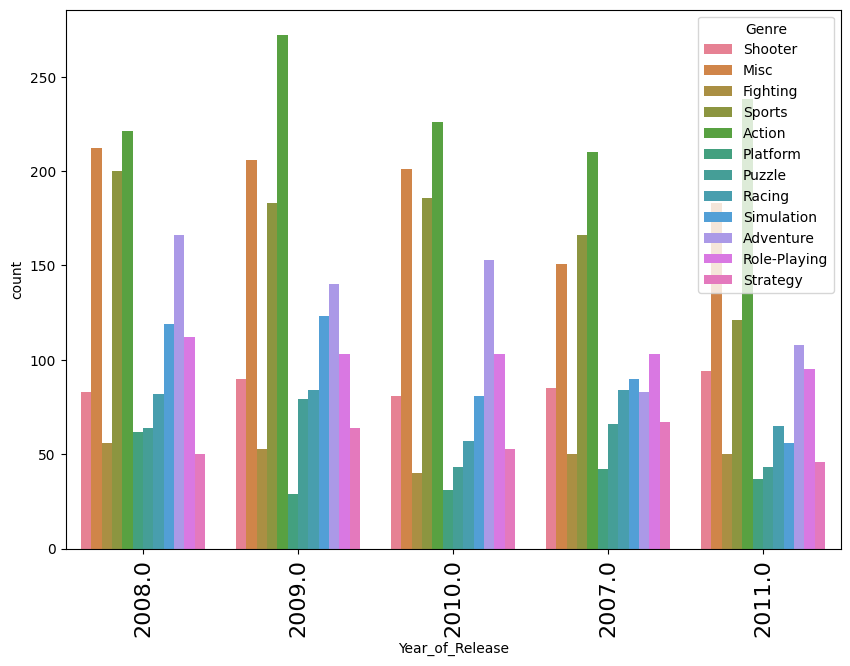

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(x="Year_of_Release", data=df, hue='Genre', order=df.Year_of_Release.value_counts().iloc[:5].index,palette='husl')
plt.xticks(size=16, rotation=90)

*Which year had the highest sales worldwide?*

<ipython-input-18-777f77609aaa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Year_of_Release", y="Global_Sales", data=df_year,palette='husl')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31,

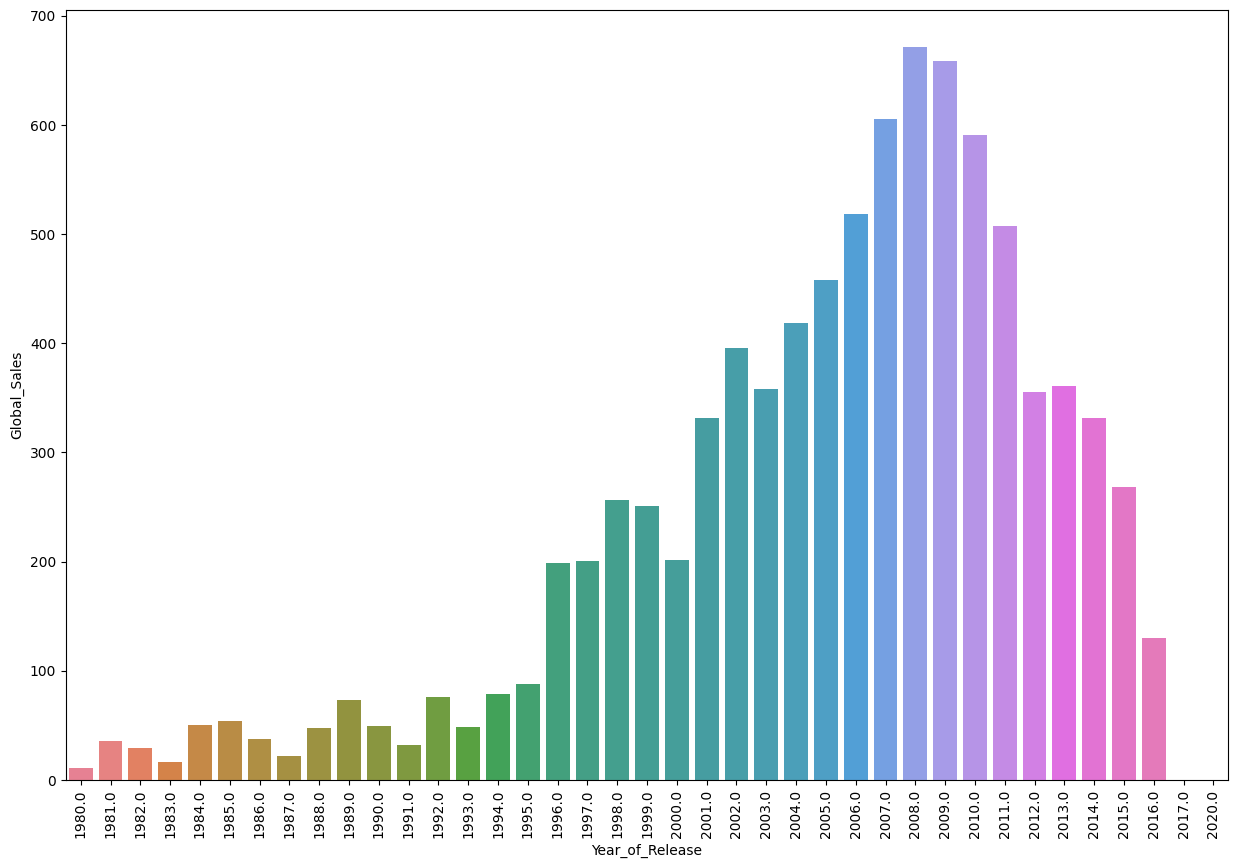

In [ ]:
df_year = df.groupby(by=['Year_of_Release'])['Global_Sales'].sum()
df_year = df_year.reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x="Year_of_Release", y="Global_Sales", data=df_year,palette='husl')
plt.xticks(rotation=90)

*Which genre game have the highest sale price globally?*

<ipython-input-19-0846298946d0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Genre", y="Global_Sales", data=df_genre,palette='husl')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

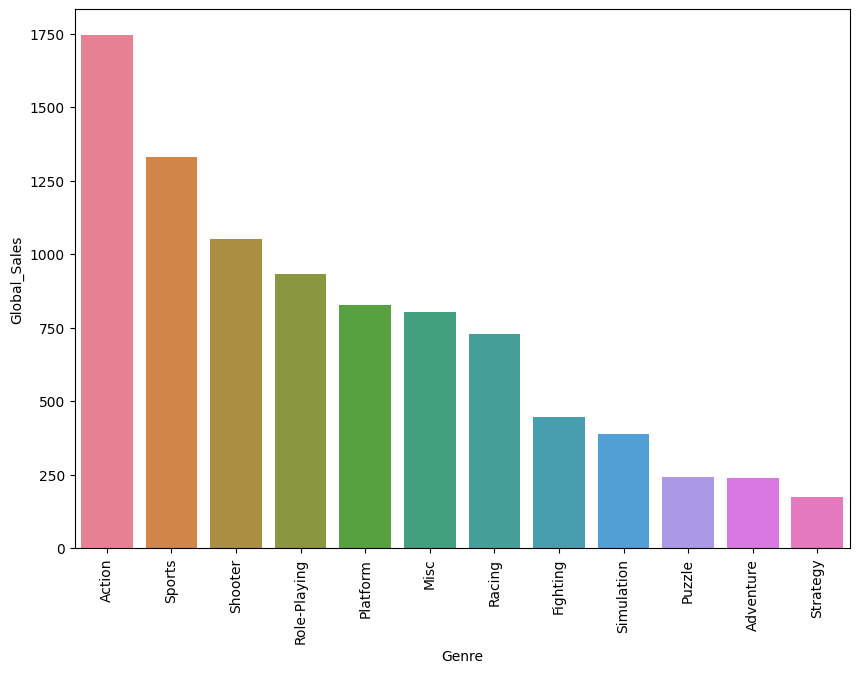

In [ ]:
df_genre = df.groupby(by=['Genre'])['Global_Sales'].sum()
df_genre = df_genre.reset_index()
df_genre = df_genre.sort_values(by=['Global_Sales'], ascending=False)
plt.figure(figsize=(10, 7))
sns.barplot(x="Genre", y="Global_Sales", data=df_genre,palette='husl')
plt.xticks(rotation=90)


*Top 10 platfrom having the highest sale price globally*

<ipython-input-20-26d7123f0bbf>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Platform", y="Global_Sales", data=df_platform,palette='husl')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PS4'),
  Text(8, 0, 'PSP'),
  Text(9, 0, 'PC')])

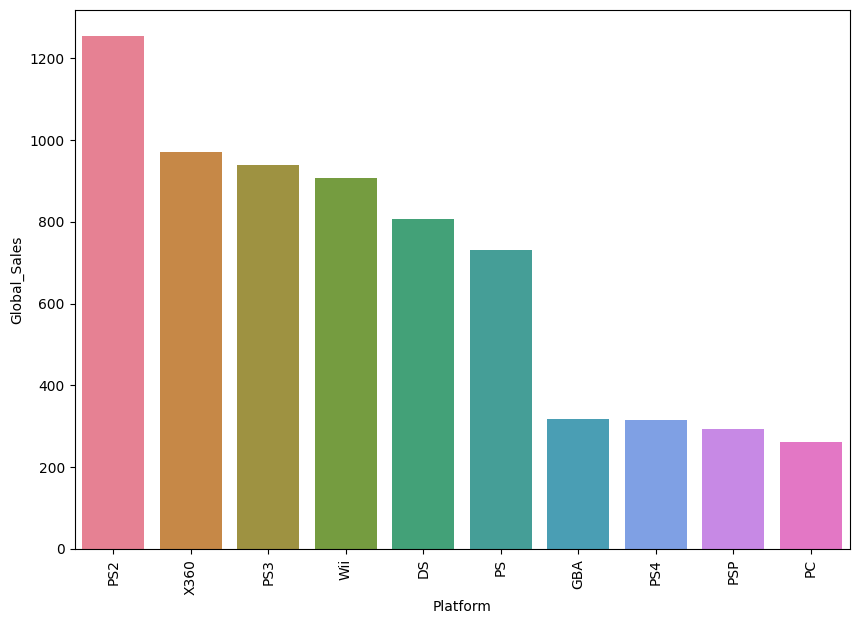

In [ ]:
df_platform = df.groupby(by=['Platform'])['Global_Sales'].sum()
df_platform = df_platform.reset_index()
df_platform = df_platform.sort_values(by=['Global_Sales'], ascending=False).head(10)
plt.figure(figsize=(10, 7))
sns.barplot(x="Platform", y="Global_Sales", data=df_platform,palette='husl')
plt.xticks(rotation=90)



*Top 20 Publishers by Global Sales*

<ipython-input-21-8ad5e99487d5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl,palette='husl')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'Atari'),
  Text(13, 0, 'Warner Bros. Interactive Entertainment'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'LucasArts'),
  Text(18, 0, 'Bethesda Softworks'),
  Text(19, 0, 'Midway Games')])

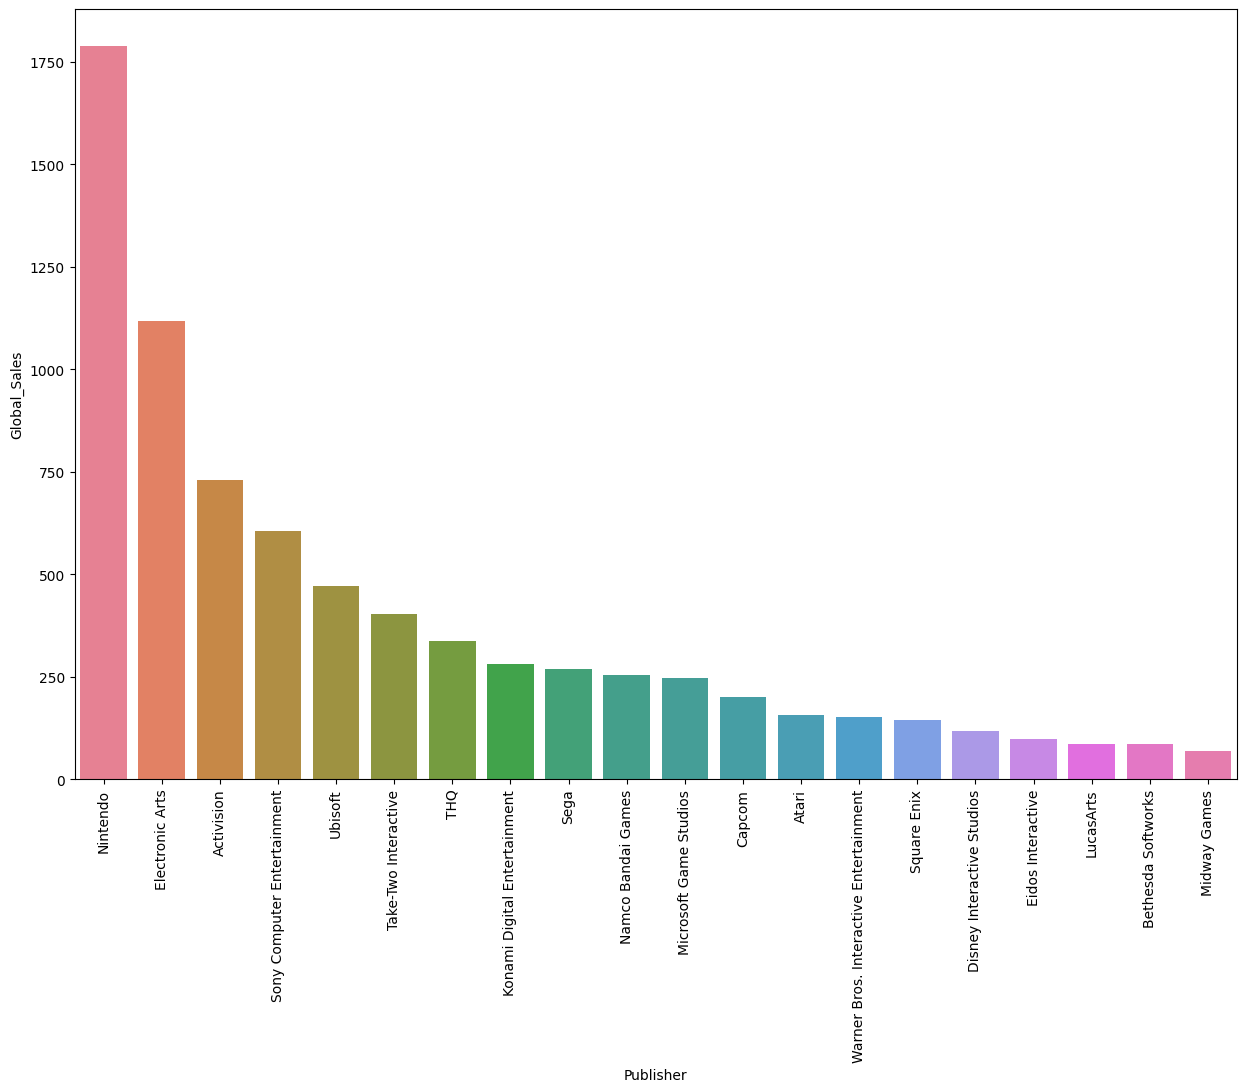

In [ ]:
sale_pbl = df[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl,palette='husl')
plt.xticks(rotation=90)

*Sales compearison by genre*

In [ ]:
comp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

comp_map = comp_genre.groupby(by=['Genre']).sum()

comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()


,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,879.01
1,Adventure,NA_Sales,105.26
2,Fighting,NA_Sales,223.36
3,Misc,NA_Sales,407.27
4,Platform,NA_Sales,445.50


<Axes: xlabel='Genre', ylabel='Sale_Price'>

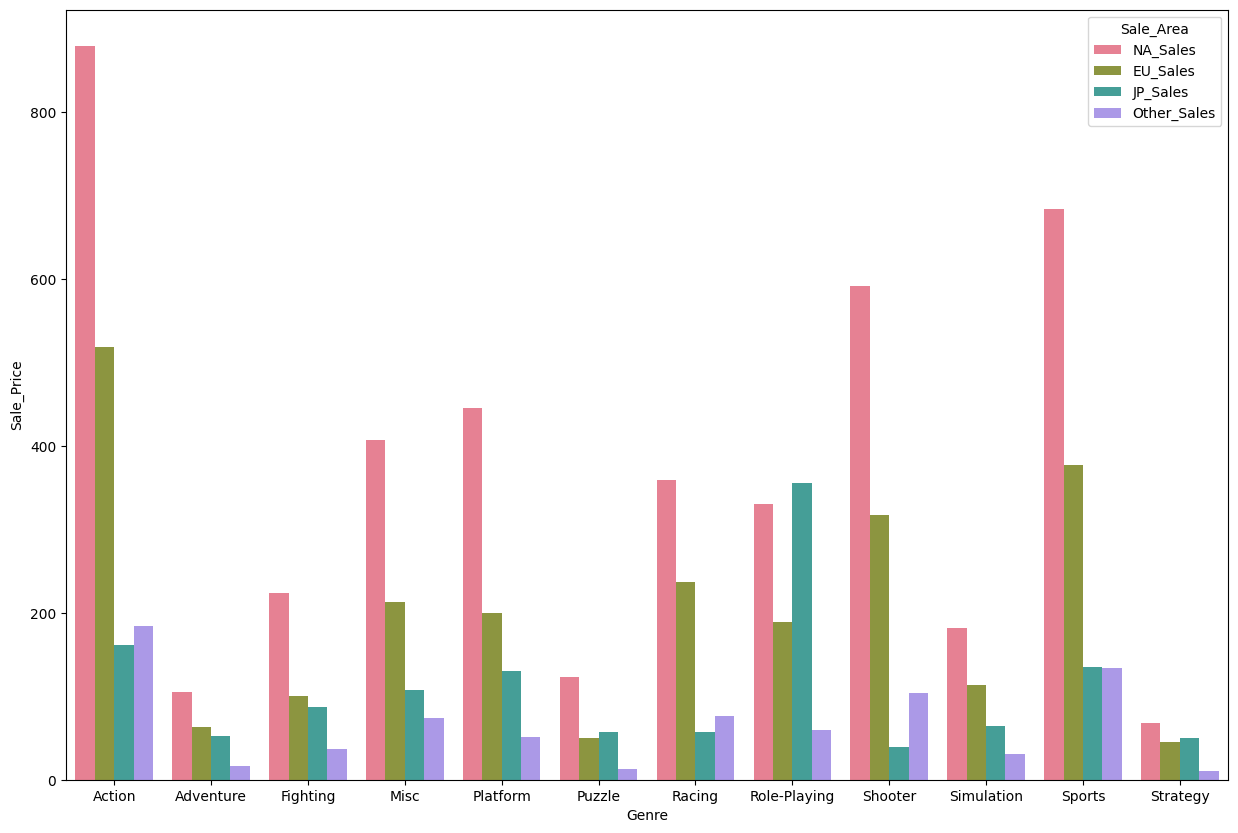

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table,palette='husl')

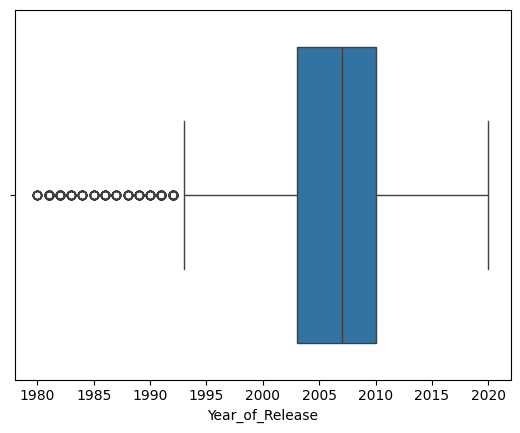

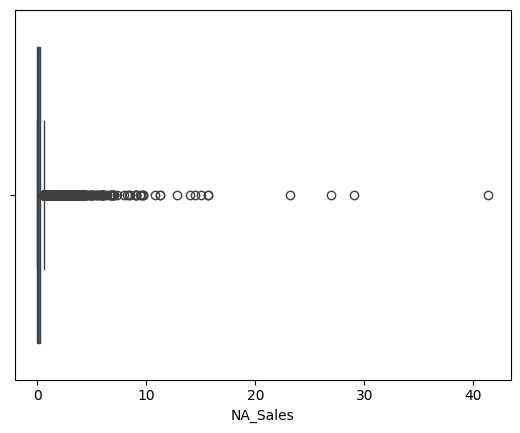

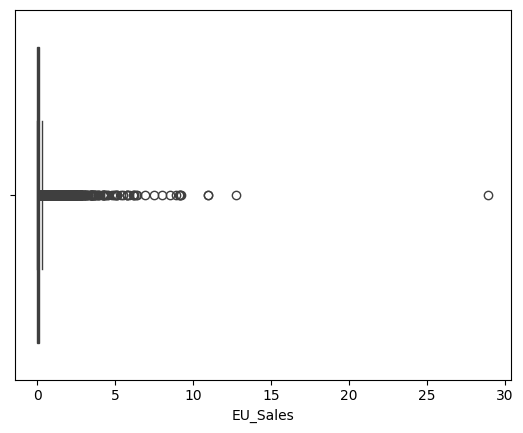

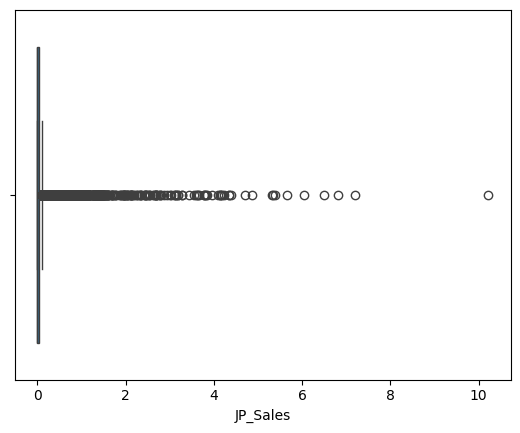

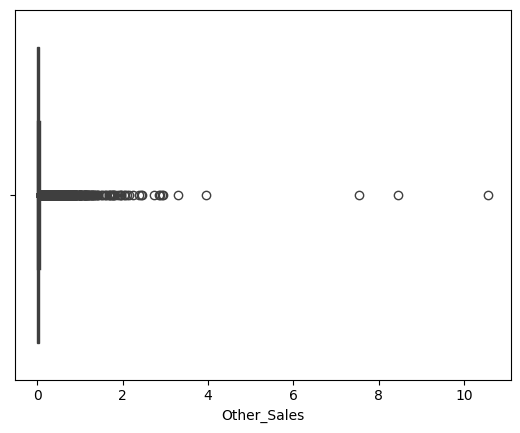

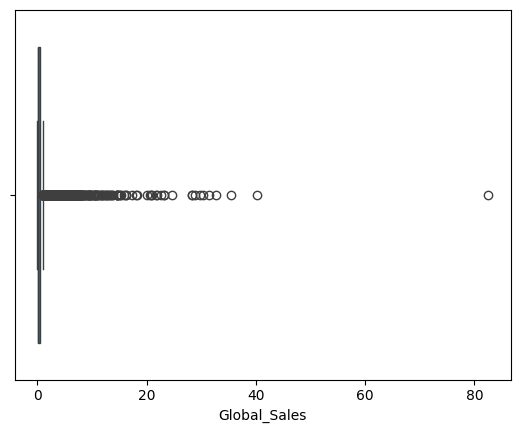

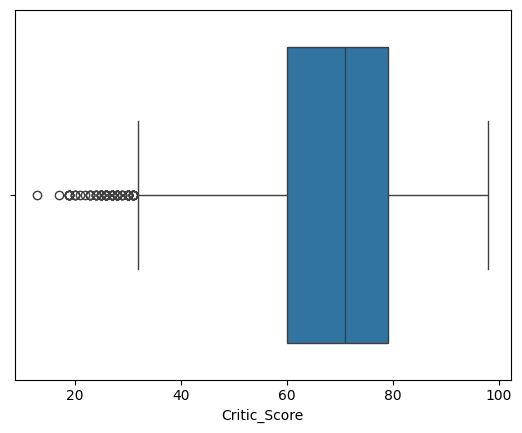

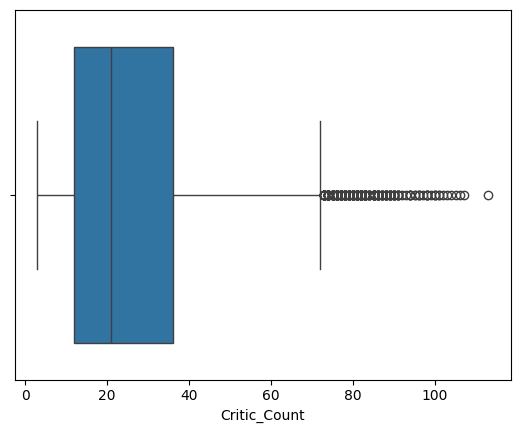

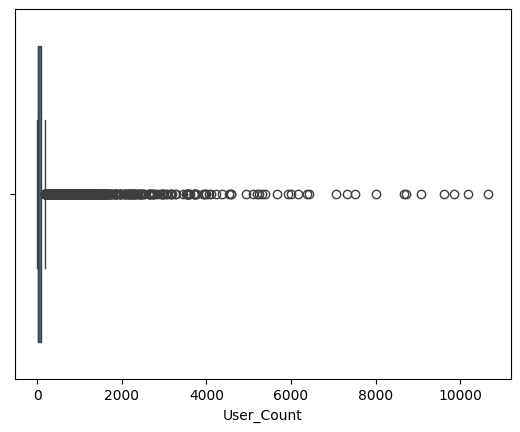

In [ ]:
#Boxplot for detecting Outliers
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(x=i,data=df)
  plt.show()

**DATA PREPROCESSING**

In [ ]:
#Handling 'tbd' Values in the 'User_Score' Column
df['User_Score']=df['User_Score'].str.replace('tbd','0')
df['User_Score']=df['User_Score'].astype(float)
df.loc[df.User_Score==0,'User_Score']=np.NaN

In [ ]:
#Dropping unwanted columns
df.drop(['Name','User_Score','User_Count'],inplace=True,axis=1)

In [ ]:
#Treating Missing Values
float_lst=['Year_of_Release','Critic_Score','Critic_Count']
obj_lst=['Genre','Publisher','Developer','Rating']
for i in float_lst:
  df[i].fillna(df[i].median(),inplace=True)
for j in obj_lst:
  df[j].fillna(df[j].mode()[0],inplace=True)
df.isna().sum()

Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
Developer          0
Rating             0
dtype: int64

In [ ]:
# Label encoding
end=LabelEncoder()
obj=['Platform','Genre','Publisher','Developer','Rating']
for k in obj:
  df[k]=end.fit_transform(df[k])
df.dtypes

Platform             int64
Year_of_Release    float64
Genre                int64
Publisher            int64
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
Developer            int64
Rating               int64
dtype: object

In [ ]:
#Outliers Treatment
def wisker(col):
  q1=col.quantile(0.25)
  q3=col.quantile(0.75)
  IQR=q3-q1
  LW=q1-1.5*IQR  #lower wisker
  UW=q3+1.5*IQR  #upper wisker
  return LW,UW

In [ ]:
for i in ['Year_of_Release','NA_Sales','EU_Sales','JP_Sales','Global_Sales']:
  LW,UW=wisker(df[i])
  df[i]=np.where(df[i]<LW,LW,df[i])
  df[i]=np.where(df[i]>UW,UW,df[i])

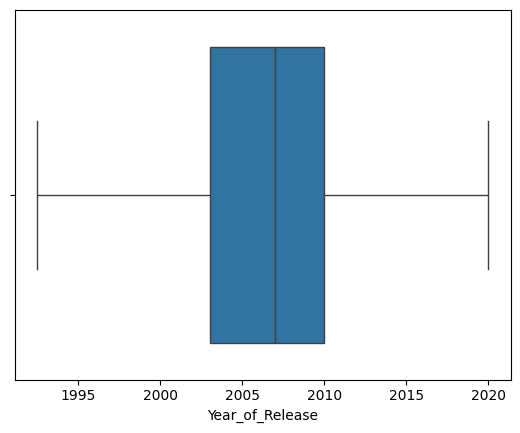

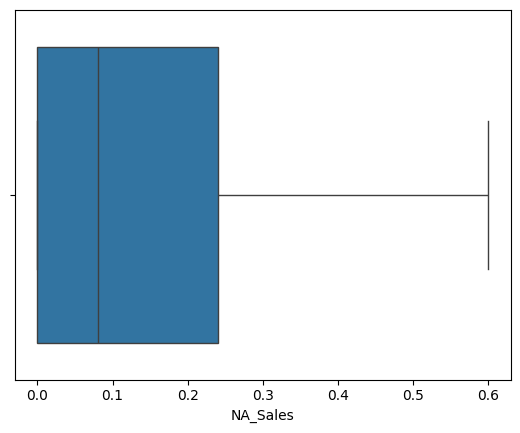

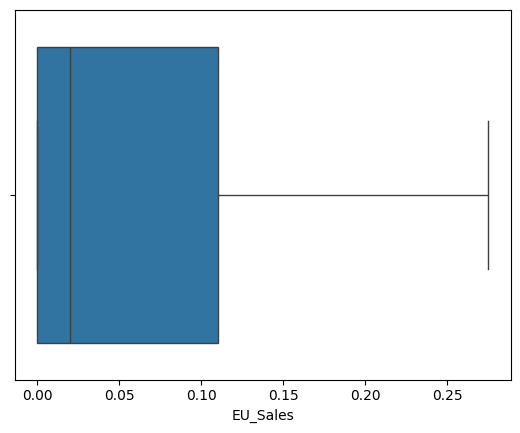

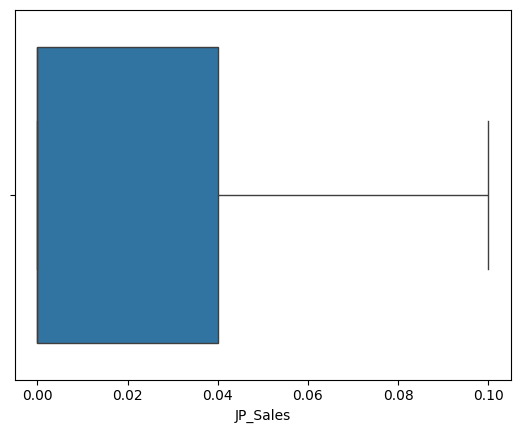

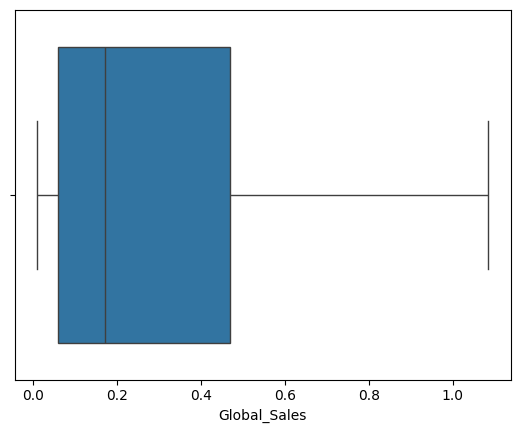

In [ ]:
for i in ['Year_of_Release','NA_Sales','EU_Sales','JP_Sales','Global_Sales']:
  sns.boxplot(x=i,data=df)
  plt.show()

In [ ]:
df.corr()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,Developer,Rating
Platform,1.000000,0.152972,0.025831,-0.012459,0.081625,0.109588,-0.097940,0.054925,0.069954,-0.005513,0.192500,-0.101833,0.214526
Year_of_Release,0.152972,1.000000,-0.141181,0.023443,-0.116948,-0.012710,-0.124716,0.037863,-0.142362,-0.004896,0.135879,-0.128462,0.123047
Genre,0.025831,-0.141181,1.000000,-0.051317,0.024844,0.003896,0.003857,0.011819,0.045629,0.093737,0.001999,-0.081574,-0.059149
Publisher,-0.012459,0.023443,-0.051317,1.000000,-0.022246,0.010149,0.092047,0.012640,0.007904,-0.000720,0.027197,0.165001,-0.016478
NA_Sales,0.081625,-0.116948,0.024844,-0.022246,1.000000,0.708834,-0.010942,0.370998,0.879027,0.230880,0.340552,-0.125075,0.118074
EU_Sales,0.109588,-0.012710,0.003896,0.010149,0.708834,1.000000,0.013422,0.360399,0.808631,0.233026,0.364907,-0.099383,0.158117
JP_Sales,-0.097940,-0.124716,0.003857,0.092047,-0.010942,0.013422,1.000000,0.134032,0.233551,0.161493,0.146097,0.215245,-0.098172
Other_Sales,0.054925,0.037863,0.011819,0.012640,0.370998,0.360399,0.134032,1.000000,0.404227,0.170271,0.255615,-0.047418,0.068428
Global_Sales,0.069954,-0.142362,0.045629,0.007904,0.879027,0.808631,0.233551,0.404227,1.000000,0.274491,0.368633,-0.060638,0.099661
Critic_Score,-0.005513,-0.004896,0.093737,-0.000720,0.230880,0.233026,0.161493,0.170271,0.274491,1.000000,0.394183,0.068171,-0.023968


<Axes: >

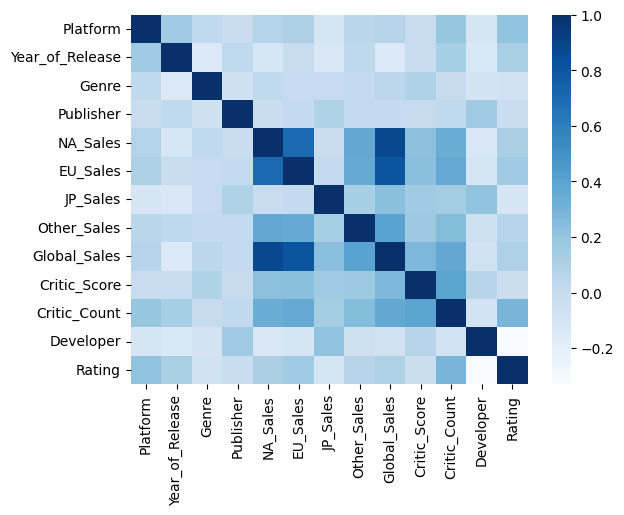

In [ ]:
sns.heatmap(df.corr(),cmap='Blues')

**SEPERATING X AND Y**

In [ ]:
x=df.drop(['Global_Sales'],axis=1)
x

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,Developer,Rating
0,26,2006.0,10,361,0.60,0.275,0.10,8.45,76.0,51.0,1020,1
1,11,1992.5,4,361,0.60,0.275,0.10,0.77,71.0,21.0,1539,1
2,26,2008.0,6,361,0.60,0.275,0.10,3.29,82.0,73.0,1020,1
3,26,2009.0,10,361,0.60,0.275,0.10,2.95,80.0,73.0,1020,1
4,5,1996.0,7,361,0.60,0.275,0.10,1.00,71.0,21.0,1539,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16714,17,2016.0,0,503,0.00,0.000,0.01,0.00,71.0,21.0,1539,1
16715,28,2006.0,10,91,0.00,0.010,0.00,0.00,71.0,21.0,1539,1
16716,20,2016.0,1,233,0.00,0.000,0.01,0.00,71.0,21.0,1539,1
16717,6,2003.0,4,549,0.01,0.000,0.00,0.00,71.0,21.0,1539,1


In [ ]:
y=df['Global_Sales']
y

0        1.085
1        1.085
2        1.085
3        1.085
4        1.085
         ...  
16714    0.010
16715    0.010
16716    0.010
16717    0.010
16718    0.010
Name: Global_Sales, Length: 16719, dtype: float64

**SPLITTING DATA FOR TRAINING AND TESTING**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,Developer,Rating
7408,18,2014.0,1,505,0.10,0.070,0.00,0.04,83.0,6.0,1469,5
2316,29,2004.0,7,21,0.60,0.240,0.00,0.04,82.0,63.0,1176,7
14308,6,2006.0,10,139,0.02,0.010,0.00,0.00,57.0,4.0,431,1
7931,4,2009.0,0,277,0.00,0.000,0.10,0.00,71.0,21.0,1539,1
10095,16,2005.0,0,528,0.06,0.040,0.00,0.01,68.0,39.0,372,5
...,...,...,...,...,...,...,...,...,...,...,...,...
11284,4,2009.0,9,21,0.08,0.000,0.00,0.01,71.0,21.0,1314,1
11964,18,2015.0,7,364,0.03,0.000,0.03,0.01,78.0,33.0,1358,7
5390,17,2008.0,3,139,0.25,0.050,0.00,0.04,54.0,4.0,477,1
860,17,2010.0,10,139,0.60,0.275,0.00,0.32,80.0,46.0,429,7


In [ ]:
x_test

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,Developer,Rating
6991,29,2005.0,0,548,0.17,0.050,0.00,0.01,84.0,47.0,1167,7
16195,4,2010.0,1,167,0.00,0.000,0.01,0.00,71.0,21.0,1539,1
9862,28,2016.0,10,497,0.09,0.020,0.00,0.01,71.0,21.0,12,1
11152,4,2005.0,4,491,0.07,0.010,0.00,0.01,71.0,21.0,1539,1
8642,4,2007.0,3,6,0.15,0.000,0.00,0.01,71.0,21.0,1539,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12024,4,2011.0,3,185,0.07,0.000,0.00,0.00,71.0,21.0,7,1
14568,6,2003.0,7,303,0.02,0.010,0.00,0.00,70.0,11.0,1002,1
1118,28,2008.0,8,139,0.60,0.275,0.02,0.16,72.0,76.0,442,5
11763,15,1998.0,7,289,0.00,0.000,0.07,0.00,71.0,21.0,1539,1


In [ ]:
y_train

7408     0.210
2316     0.900
14308    0.030
7931     0.190
10095    0.110
         ...  
11284    0.080
11964    0.070
5390     0.340
860      1.085
15795    0.020
Name: Global_Sales, Length: 11703, dtype: float64

In [ ]:
y_test

6991     0.230
16195    0.010
9862     0.120
11152    0.090
8642     0.160
         ...  
12024    0.070
14568    0.030
1118     1.085
11763    0.070
1287     1.085
Name: Global_Sales, Length: 5016, dtype: float64

**MODEL CREATION**

In [ ]:

model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0.22 , 0.01 , 0.11 , ..., 1.085, 0.07 , 1.085])

**PERFORMANCE EVALUATION**

In [ ]:
df1=pd.DataFrame({'Actual Data':y_test,'Predicted Data':y_pred,'Difference':y_test-y_pred})
df1

,Actual Data,Predicted Data,Difference
6991,0.230,0.220,1.000000e-02
16195,0.010,0.010,2.255141e-17
9862,0.120,0.110,1.000000e-02
11152,0.090,0.090,0.000000e+00
8642,0.160,0.160,2.775558e-17
...,...,...,...
12024,0.070,0.070,-2.775558e-17
14568,0.030,0.020,1.000000e-02
1118,1.085,1.085,8.215650e-15
11763,0.070,0.070,-2.775558e-17


In [ ]:
#Mean absolute error
print('Error is',mean_absolute_error(y_test,y_pred))

Error is 0.03185589447102644


In [ ]:
#Mean squared error
data=mean_squared_error(y_test,y_pred)
print('Mean Squared Error is',data)

Mean Squared Error is 0.008842928877591706


In [ ]:
#root mean squared error
print('Root mean squared error is',np.sqrt(data))

Root mean squared error is 0.09403684850946306


In [ ]:
#R2 score
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)

R-squared Score: 0.928388289840294


In [ ]:
error=mean_absolute_percentage_error(y_test,y_pred)
error

0.12822158861384114

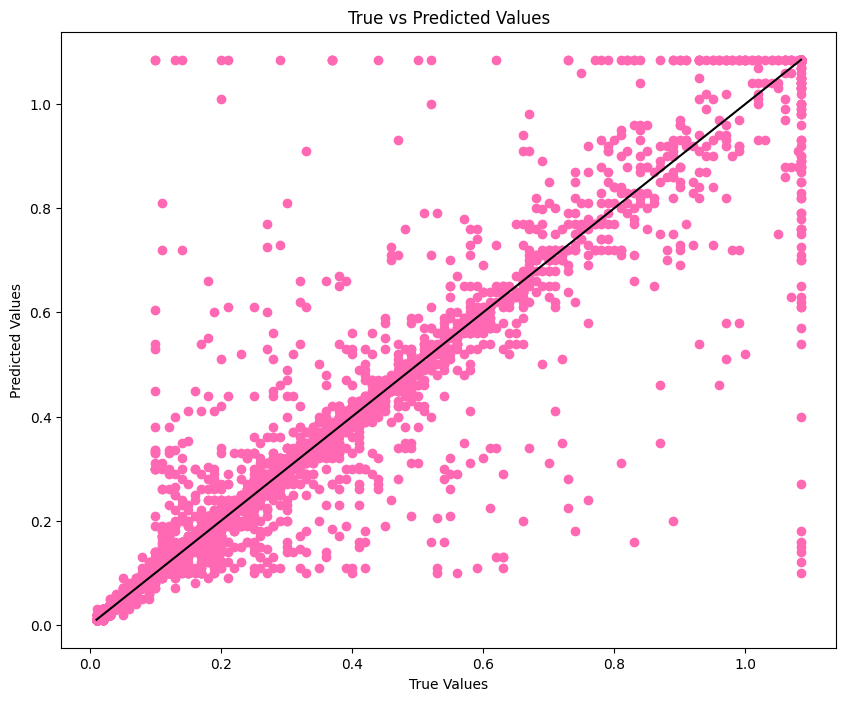

In [ ]:
# Assuming y_test and y_pred are your test and predicted values, respectively plottingTrue vs Predicted Values Scatter Plot
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='hotpink')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='k')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()
